Epoch 1/20
16/16 [==============================] - 3s 87ms/step - loss: 2.8210 - accuracy: 0.5065 - val_loss: 1.8555 - val_accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 2s 99ms/step - loss: 1.5360 - accuracy: 0.6850 - val_loss: 1.3735 - val_accuracy: 0.6880
Epoch 3/20
16/16 [==============================] - 2s 104ms/step - loss: 1.1712 - accuracy: 0.7417 - val_loss: 1.2016 - val_accuracy: 0.7370
Epoch 4/20
16/16 [==============================] - 2s 102ms/step - loss: 0.9580 - accuracy: 0.7902 - val_loss: 1.1094 - val_accuracy: 0.7530
Epoch 5/20
16/16 [==============================] - 2s 102ms/step - loss: 0.8047 - accuracy: 0.8191 - val_loss: 1.0266 - val_accuracy: 0.7760
Epoch 6/20
16/16 [==============================] - 2s 96ms/step - loss: 0.6736 - accuracy: 0.8497 - val_loss: 0.9674 - val_accuracy: 0.7800
Epoch 7/20
16/16 [==============================] - 3s 160ms/step - loss: 0.5624 - accuracy: 0.8799 - val_loss: 0.9187 - val_accuracy: 0.8010
Epoch 8/2

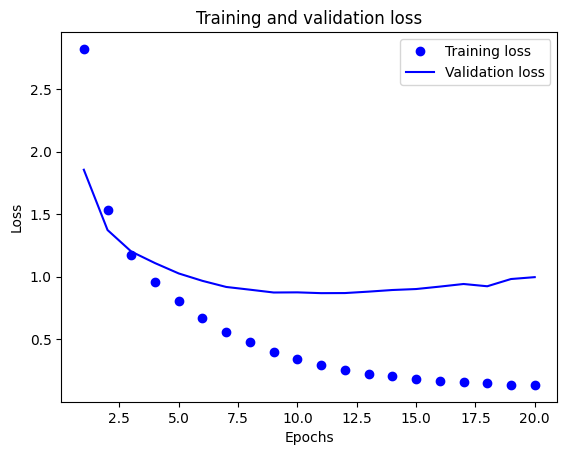

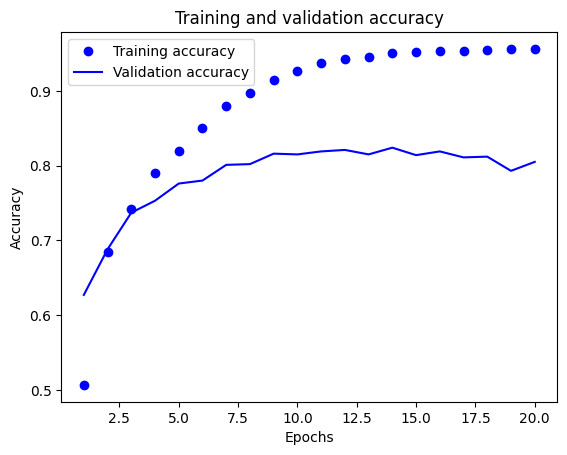

Epoch 1/9
18/18 [==============================] - 1s 48ms/step - loss: 2.5680 - accuracy: 0.4913
Epoch 2/9
18/18 [==============================] - 1s 46ms/step - loss: 1.4760 - accuracy: 0.6837
Epoch 3/9
18/18 [==============================] - 1s 46ms/step - loss: 1.1463 - accuracy: 0.7573
Epoch 4/9
18/18 [==============================] - 1s 49ms/step - loss: 0.9347 - accuracy: 0.8034
Epoch 5/9
18/18 [==============================] - 1s 48ms/step - loss: 0.7767 - accuracy: 0.8356
Epoch 6/9
18/18 [==============================] - 1s 47ms/step - loss: 0.6472 - accuracy: 0.8598
Epoch 7/9
18/18 [==============================] - 1s 75ms/step - loss: 0.5462 - accuracy: 0.8828
Epoch 8/9
18/18 [==============================] - 2s 85ms/step - loss: 0.4599 - accuracy: 0.9022
Epoch 9/9
71/71 [==============================] - 0s 3ms/step
Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 2.9745 - accuracy: 0.1884 - val_loss: 2.2956 - val_accuracy: 0.2590
Epoch 2/20
6

In [ ]:
## ANNISA RACHMAN - 2006569963
## No 3 - Classifying Newswires

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters

## THe Reuters Dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

len(train_data)

len(test_data)

train_data[10]
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value)
in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i -
3, "?") for i in
    train_data[0]])

train_labels[10]

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

## Preparing The Data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


## Building The Model
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])


## Compiling The Model
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
    )

## Validating The Approach
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## Training THe Model
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
    )

## Display Training and Validation Loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


## Display Training and Validation Accuracy
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
    )
model.fit(
    x_train,
    y_train,
    epochs=9,
    batch_size=512
    )
results = model.evaluate(x_test, y_test)


## Generating Predictions on New Data
predictions = model.predict(x_test)
predictions[0].shape
np.sum(predictions[0])
np.argmax(predictions[0])

## A different way to handle the labels and the loss
y_train = np.array(train_labels)
y_test = np.array(test_labels)
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
    )

## The importance of having sufficiently large intermediate layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
    )
model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val)
    )
